In [6]:
import pickle
from pathlib import Path

def load_eeg_data(novel, subject_range, eeg_run_range, base_folder):
    """
    加载 EEG 数据，文本和文本嵌入。
    
    Args:
        novel (str): 小说名称，例如 'LittlePrince'。
        subject_range (range): 被试范围，例如 range(4, 16)。
        eeg_run_range (range): EEG 运行编号范围，例如 range(1, 8)。
        base_folder (str): 保存数据的根目录。
    
    Returns:
        data (list): 每个元素包含 (subject, eeg_run, cut_eeg_data, texts, text_embeddings)。
    """
    data = []
    for subject in subject_range:
        save_folder = f'{base_folder}/{novel}/sub{subject:02}'
        for eeg_run in eeg_run_range:
            file_path = Path(f'{save_folder}/run_{eeg_run}.pkl')
            if not file_path.exists():
                print(f"File not found: {file_path}")
                continue
            
            try:
                with open(file_path, 'rb') as file:
                    cut_eeg_data, texts, text_embeddings = pickle.load(file)
                    data.append((subject, eeg_run, cut_eeg_data, texts, text_embeddings))
                    print(f"Loaded data from {file_path}")
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    
    return data

cut_eeg_data, texts, text_embeddings=load_eeg_data('LittlePrince', [4],[1],'Data')[0][2:]

Loaded data from Data/LittlePrince/sub04/run_1.pkl


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# 可视化多通道 EEG 信号
for i, sample in enumerate(samples):
    eeg_signal = sample[0].numpy()  # 假设样本格式为 (channels, time_points)
    num_channels, num_time_points = eeg_signal.shape

    # 创建 MNE 的 RawArray
    info = mne.create_info(ch_names=[f'Channel {j+1}' for j in range(num_channels)],
                           sfreq=128,  # 假设采样频率为 128 Hz
                           ch_types='eeg')  # 通道类型为 EEG
    raw = mne.io.RawArray(eeg_signal, info)

    # 绘制 Raw 数据
    fig = raw.plot(show=False, title=f'EEG Sample {i+1} - Multichannel Signal', scalings='auto')
    fig.savefig(f'eeg_sample_{i+1}_multichannel_signal.png', dpi=300, bbox_inches='tight')  # 保存为图片
    plt.close()
    print(f"Saved EEG multichannel signal visualization for sample {i+1}.")


Creating RawArray with float64 data, n_channels=128, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.992 secs
Ready.
Using matplotlib as 2D backend.
Saved EEG multichannel signal visualization for sample 1.
Creating RawArray with float64 data, n_channels=128, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.992 secs
Ready.
Saved EEG multichannel signal visualization for sample 2.


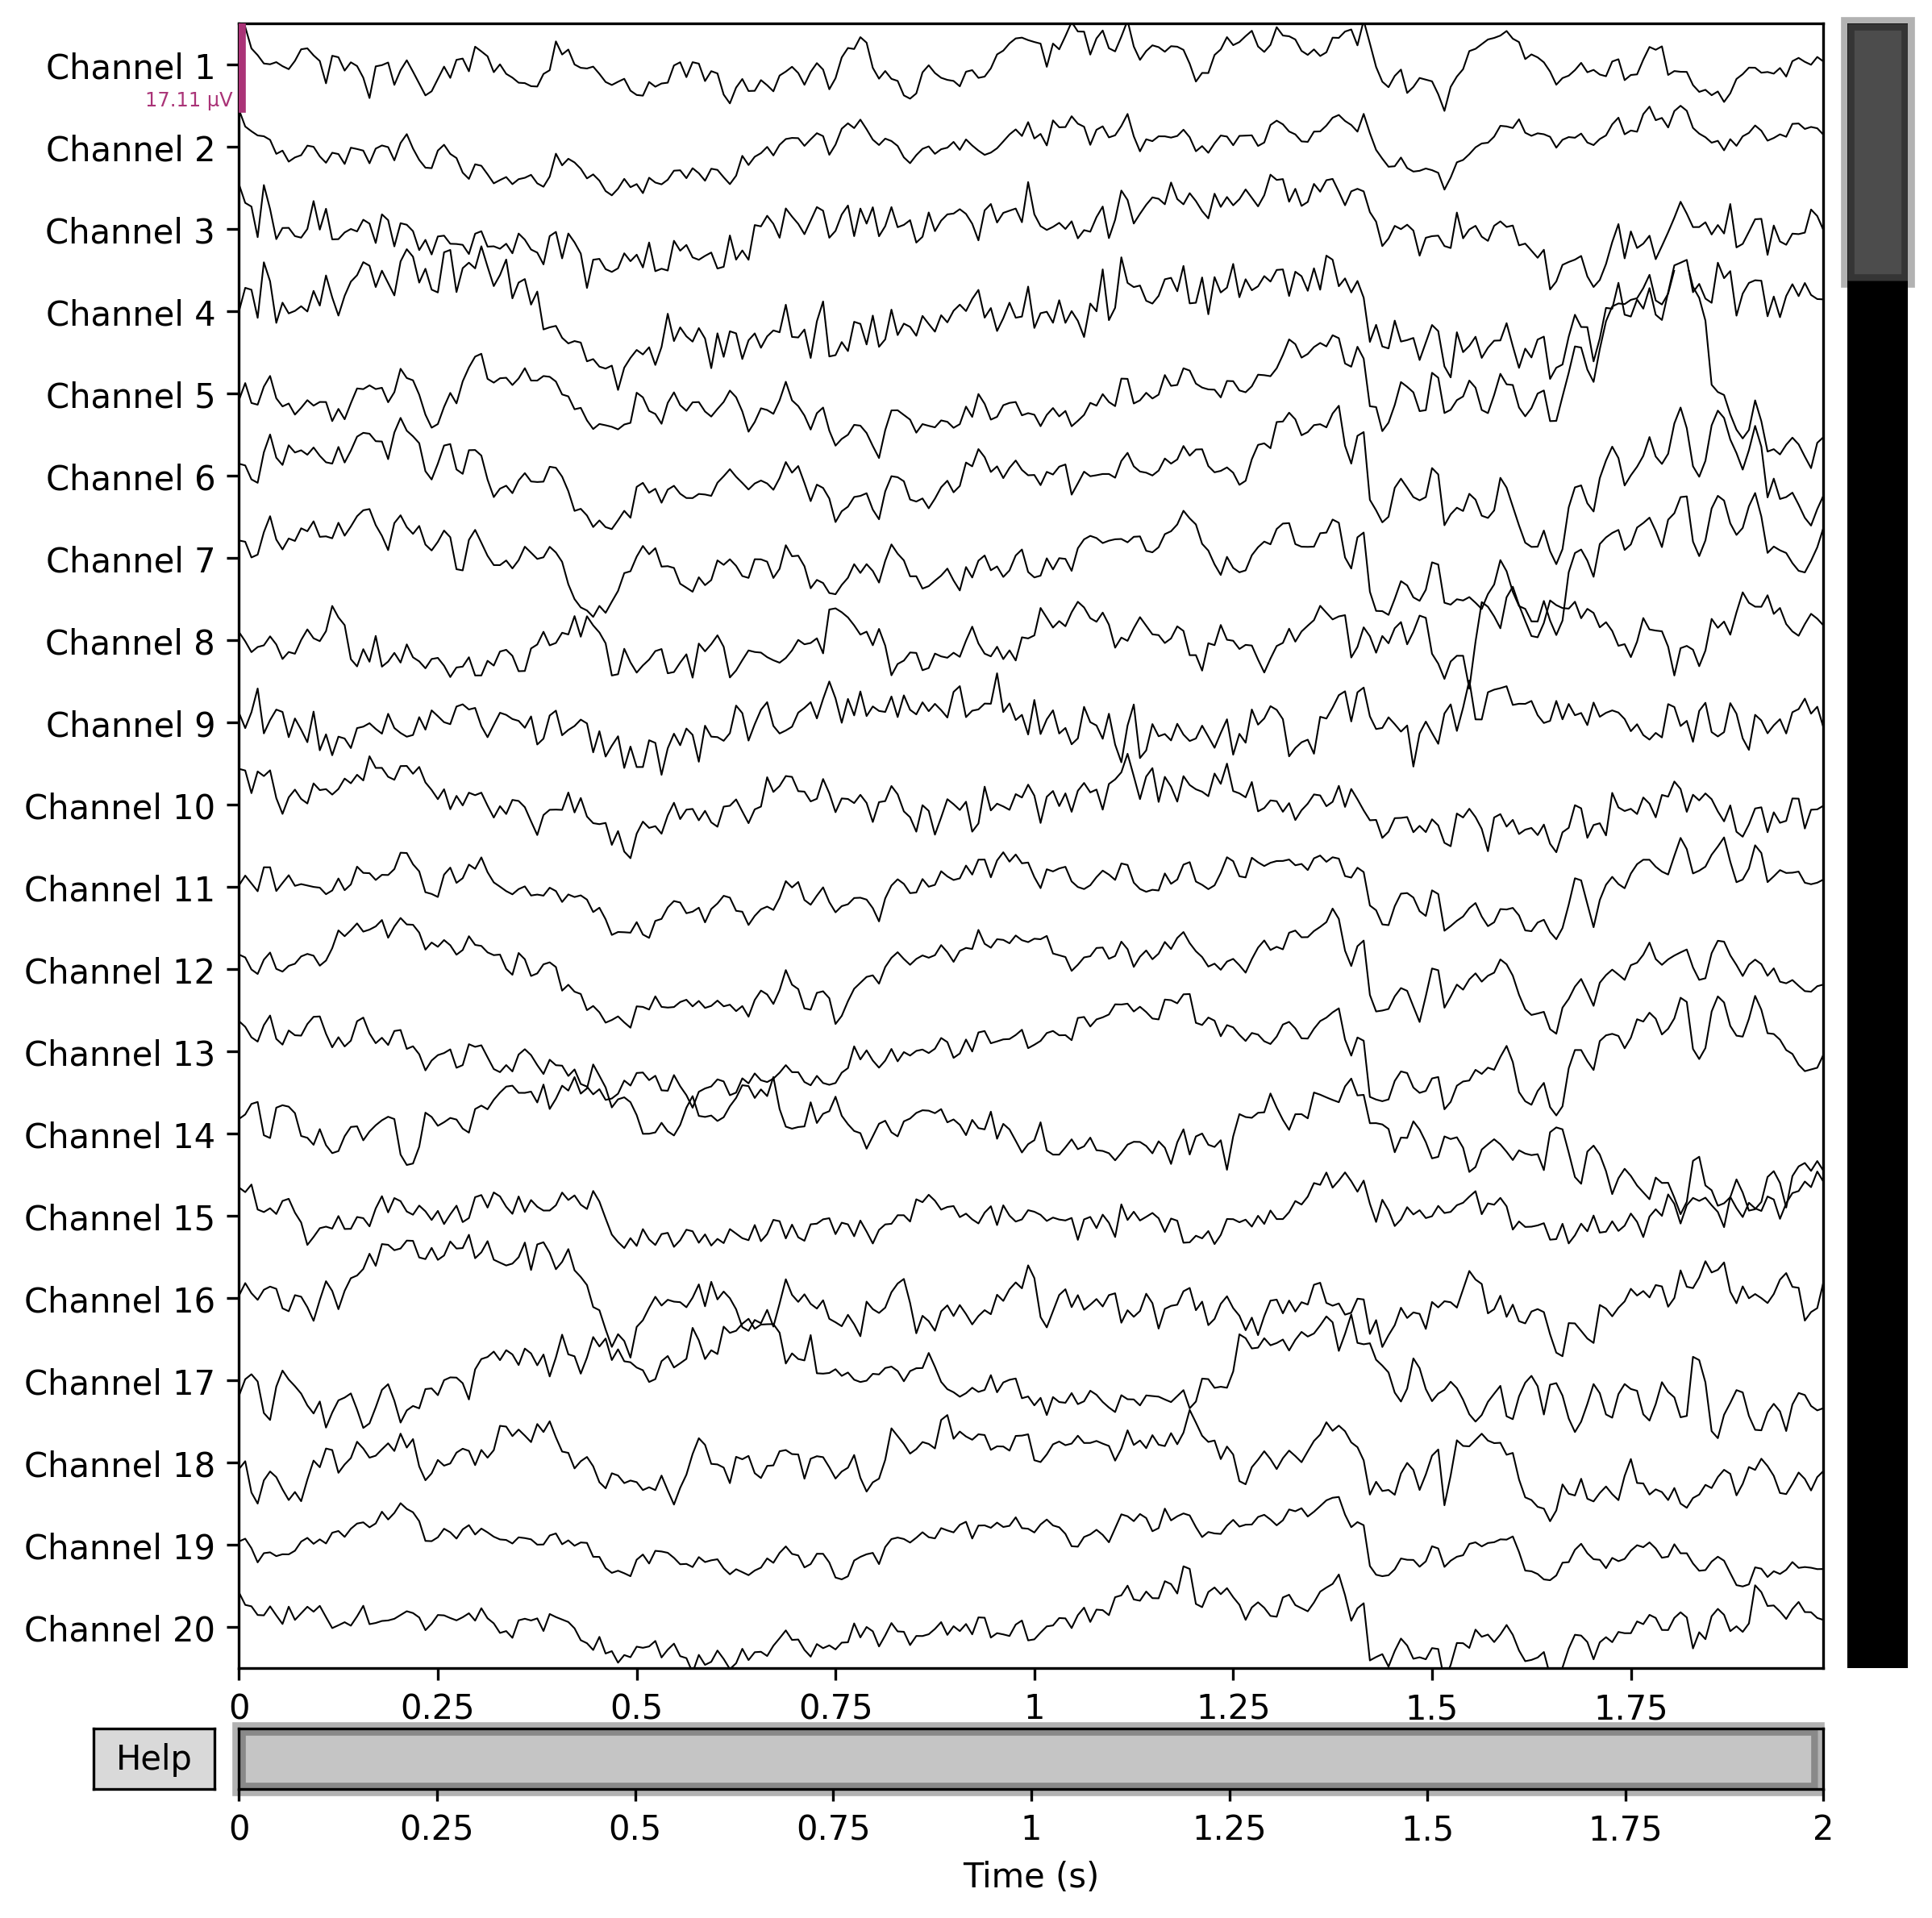

In [2]:
from IPython.display import Image, display


display(Image(filename='eeg_sample_1_multichannel_signal.png'))